<a href="https://colab.research.google.com/github/Kavyapriyakp/Environmental-Hydrology-for-Data-Science/blob/main/Predicting_AQI_Levels_for_Chennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contributed by: Haasshim Mohamed (RA1911003010606) and Kavyapriya R (RA1811029010034)


In [ ]:
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
import plotly.express as px
import plotly
# To find geo-data of street addresses and states. 
import geopy
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df_city = pd.read_csv('/content/city_day.csv')
df_stations = pd.read_csv('/content/station_day.csv')
stations = pd.read_csv('/content/stations.csv')

In [80]:
print(df_city.info())
df_city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
 16  State       29531 non-null  object 
 17  State_ID    29531 non-null  int64  
dtypes: float64(13), int64(1), object(4)
memory usage: 4.1+ MB
None


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,State,State_ID
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,Gujarat,12
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,Gujarat,12
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,Gujarat,12
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,Gujarat,12
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,Gujarat,12


In [81]:
print(df_stations.info())
df_stations.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108035 entries, 0 to 108034
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   StationId       108035 non-null  object 
 1   Date            108035 non-null  object 
 2   PM2.5           86410 non-null   float64
 3   PM10            65329 non-null   float64
 4   NO              90929 non-null   float64
 5   NO2             91488 non-null   float64
 6   NOx             92535 non-null   float64
 7   NH3             59930 non-null   float64
 8   CO              95037 non-null   float64
 9   SO2             82831 non-null   float64
 10  O3              82467 non-null   float64
 11  Benzene         76580 non-null   float64
 12  Toluene         69333 non-null   float64
 13  Xylene          22898 non-null   float64
 14  AQI             108035 non-null  float64
 15  AQI_Bucket      108035 non-null  object 
 16  StationName     108035 non-null  object 
 17  City      

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status,street address,latitude,longitude
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,"Secretariat, Amaravati",16.513469,80.517227
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,"Secretariat, Amaravati",16.513469,80.517227
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,"Secretariat, Amaravati",16.513469,80.517227
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,"Secretariat, Amaravati",16.513469,80.517227
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,"Secretariat, Amaravati",16.513469,80.517227


In [82]:
print(stations.info())
stations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB
None


,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


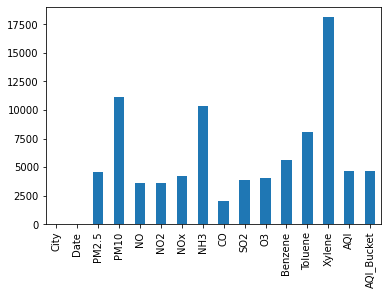

In [ ]:
df_city.isnull().sum().plot(kind ='bar')

In [ ]:
df_city['AQI'].fillna(method = 'ffill',inplace = True)
df_city['AQI'].fillna(method = 'bfill',inplace = True)
df_city['AQI'].fillna(value = 0,inplace = True)


df_stations['AQI'].fillna(method = 'ffill',inplace = True)
df_stations['AQI'].fillna(method = 'bfill',inplace = True)
df_stations['AQI'].fillna(value = 0,inplace = True)

In [ ]:
def get_geo(station_address,city):
    # getting just the street address from station_address
    
    street_address = ''
    temp = station_address.split(',')
    street_address = temp[:1]
        
    geolocator = Nominatim(user_agent="Shirazfromkaggle")
    location = geolocator.geocode(street_address)
    
    if location is None:
        #If street level address cant be found, then just the city's coordinates should do
        location = geolocator.geocode(city)
        
        if location is None :
            #If the coordiantes of the city cant be found either, then return None.
            location = [None,None]
            return location
    
    return [location.latitude,location.longitude],street_address


# Finds the street-level addresses of the stations 
def get_address(station_address):
    street_address = ''
    temp = station_address.split()
    for i in range (0,len(temp)):
                    
        street_address += temp[i]
        if temp[i][-1] == ',':
            street_address += (" "+temp[i+1])
            break
        else:
            street_address+=' '
    return street_address

def get_AQI_bucket(x):
    
    # Here, x = AQI
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [ ]:
india_states = json.load(open('/content/india_states.geojson','r'))

state_id_map = {}

for features in india_states['features']:
    features['id'] = features['properties']['ID_1']
    state_id_map[features['properties']['NAME_1']] = features['id']
    
state_id_map

{'Andaman and Nicobar': 1,
 'Andhra Pradesh': 2,
 'Arunachal Pradesh': 3,
 'Assam': 4,
 'Bihar': 5,
 'Chandigarh': 6,
 'Chhattisgarh': 7,
 'Dadra and Nagar Haveli': 8,
 'Daman and Diu': 9,
 'Delhi': 10,
 'Goa': 11,
 'Gujarat': 12,
 'Haryana': 13,
 'Himachal Pradesh': 14,
 'Jammu and Kashmir': 15,
 'Jharkhand': 16,
 'Karnataka': 17,
 'Kerala': 18,
 'Lakshadweep': 19,
 'Madhya Pradesh': 20,
 'Maharashtra': 21,
 'Manipur': 22,
 'Meghalaya': 23,
 'Mizoram': 24,
 'Nagaland': 25,
 'Orissa': 26,
 'Puducherry': 27,
 'Punjab': 28,
 'Rajasthan': 29,
 'Sikkim': 30,
 'Tamil Nadu': 31,
 'Tripura': 32,
 'Uttar Pradesh': 33,
 'Uttaranchal': 34,
 'West Bengal': 35}

In [ ]:
city_states = {'Ahmedabad': 'Gujarat',
 'Aizawl': 'Mizoram',
 'Amaravati': 'Andhra Pradesh',
 'Amritsar': 'Punjab',
 'Bengaluru': 'Karnataka',
 'Bhopal': 'Madhya Pradesh',
 'Brajrajnagar': 'Orissa',
 'Chandigarh': 'Chandigarh',
 'Chennai': 'Tamil Nadu',
 'Coimbatore': 'Tamil Nadu',
 'Delhi': 'Delhi',
 'Ernakulam': 'Kerala',
 'Gurugram': 'Haryana',
 'Guwahati': 'Assam',
 'Hyderabad': 'Andhra Pradesh',
 'Jaipur': 'Rajasthan',
 'Jorapokhar': 'Jharkhand',
 'Kochi': 'Kerala',
 'Kolkata': 'West Bengal',
 'Lucknow': 'Uttar Pradesh',
 'Mumbai': 'Maharashtra',
 'Patna': 'Bihar',
 'Shillong': 'Meghalaya',
 'Talcher': 'Orissa',
 'Thiruvananthapuram': 'Kerala',
 'Visakhapatnam': 'Andhra Pradesh'}

locations = {'Adarsh Nagar, Jaipur - RSPCB': [26.8986698, 75.8163567],
 'Alandur Bus Depot, Chennai - CPCB': [12.9938386, 80.1622219],
 'Alipur, Delhi - DPCC': [28.7959955, 77.1360706],
 'Anand Vihar, Delhi - DPCC': [28.6256914, 77.10194106560284],
 'Ashok Vihar, Delhi - DPCC': [28.6994533, 77.1848256],
 'Aya Nagar, Delhi - IMD': [28.47649105, 77.13291315925144],
 'BTM Layout, Bengaluru - CPCB': [12.9151772, 77.6102821],
 'BWSSB Kadabesanahalli, Bengaluru - CPCB': [12.9791198, 77.5912997],
 'Ballygunge, Kolkata - WBPCB': [22.5258813, 88.3660468],
 'Bandra, Mumbai - MPCB': [19.0549792, 72.8402203],
 'Bapuji Nagar, Bengaluru - KSPCB': [12.9556699, 77.5402492],
 'Bawana, Delhi - DPCC': [28.79966, 77.0328847],
 'Bidhannagar, Kolkata - WBPCB': [22.58162035, 88.4523869411636],
 'Bollaram Industrial Area, Hyderabad - TSPCB': [17.5026977, 78.3645689],
 'Borivali East, Mumbai - MPCB': [19.2267228, 72.8619328],
 'Burari Crossing, Delhi - IMD': [28.7285944, 77.1993251],
 'CRRI Mathura Road, Delhi - IMD': [28.5500925, 77.2751557],
 'Central School, Lucknow - CPCB': [26.8528761, 77.79518485076366],
 'Central University, Hyderabad - TSPCB': [17.4031425, 78.45593431157263],
 'Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB': [18.9387711,
  72.8353355],
 'City Railway Station, Bengaluru - KSPCB': [12.9791198, 77.5912997],
 'Colaba, Mumbai - MPCB': [18.915091, 72.8259691],
 'DRM Office Danapur, Patna - BSPCB': [25.6093239, 85.1235252],
 'DTU, Delhi - CPCB': [28.7473272, 77.11568781182513],
 'Dr. Karni Singh Shooting Range, Delhi - DPCC': [28.5000822,
  77.26751472410736],
 'Dwarka-Sector 8, Delhi - DPCC': [28.5656109, 77.0670366],
 'East Arjun Nagar, Delhi - CPCB': [28.6569534, 77.2947178],
 'Fort William, Kolkata - WBPCB': [22.55449655, 88.33801318408831],
 'GM Office, Brajrajnagar - OSPCB': [20.296059, 85.824539],
 'GVM Corporation, Visakhapatnam - APPCB': [17.7231276, 83.3012842],
 'Golden Temple, Amritsar - PPCB': [31.61997565, 74.87654076032885],
 'Gomti Nagar, Lucknow - UPPCB': [26.8528761, 80.9988505],
 'Govt. High School Shikarpur, Patna - BSPCB': [25.6093239, 85.1235252],
 'Hebbal, Bengaluru - KSPCB': [13.0382184, 77.5919],
 'Hombegowda Nagar, Bengaluru - KSPCB': [12.9791198, 77.5912997],
 'ICRISAT Patancheru, Hyderabad - TSPCB': [17.38878595, 78.46106473453146],
 'IDA Pashamylaram, Hyderabad - TSPCB': [17.38878595, 78.46106473453146],
 'IGI Airport (T3), Delhi - IMD': [28.55489735, 77.08467458266915],
 'IGSC Planetarium Complex, Patna - BSPCB': [25.6093239, 85.1235252],
 'IHBAS, Dilshad Garden, Delhi - CPCB': [28.6517178, 77.2219388],
 'ITO, Delhi - CPCB': [28.6305091, 77.2414363],
 'Jadavpur, Kolkata - WBPCB': [22.4951079, 88.3749813],
 'Jahangirpuri, Delhi - DPCC': [28.7259717, 77.162658],
 'Jawaharlal Nehru Stadium, Delhi - DPCC': [28.58337705, 77.23354040287734],
 'Jayanagar 5th Block, Bengaluru - KSPCB': [12.9194605, 77.58332110317872],
 'Kacheripady, Ernakulam - Kerala PCB': [9.9862208, 76.2831865],
 'Kariavattom, Thiruvananthapuram - Kerala PCB': [8.5614821, 76.8829796],
 'Kurla, Mumbai - MPCB': [19.0652797, 72.8793805],
 'Lalbagh, Lucknow - CPCB': [26.7908341, 80.8701804],
 'Lodhi Road, Delhi - IMD': [28.589461, 77.2128399],
 'Lumpyngngad, Shillong - Meghalaya PCB': [25.5760446, 91.8825282],
 'Major Dhyan Chand National Stadium, Delhi - DPCC': [28.612634200000002,
  77.23733038046025],
 'Manali Village, Chennai - TNPCB': [13.1672275, 80.2598107],
 'Manali, Chennai - CPCB': [13.1672275, 80.2598107],
 'Mandir Marg, Delhi - DPCC': [28.5246601, 77.216217],
 'Maninagar, Ahmedabad - GPCB': [22.9977135, 72.6067174],
 'Mundka, Delhi - DPCC': [28.6824341, 77.0305741],
 'Muradpur, Patna - BSPCB': [28.1128875, 75.8935118],
 'NISE Gwal Pahari, Gurugram - IMD': [28.4646148, 77.0299194],
 'NSIT Dwarka, Delhi - CPCB': [28.6082819, 77.0350079],
 'Najafgarh, Delhi - DPCC': [28.612304, 76.9823908],
 'Narela, Delhi - DPCC': [28.8426096, 77.0918354],
 'Nehru Nagar, Delhi - DPCC': [28.5685108, 77.2513847],
 'Nishant Ganj, Lucknow - UPPCB': [26.8381, 80.9346001],
 'North Campus, DU, Delhi - IMD': [32.8880156, -117.24108559234455],
 'Okhla Phase-2, Delhi - DPCC': [28.5366138, 77.2756197],
 'Patparganj, Delhi - DPCC': [28.6115923, 77.2905644],
 'Peenya, Bengaluru - CPCB': [13.0329419, 77.5273253],
 'Plammoodu, Thiruvananthapuram - Kerala PCB': [8.5241122, 76.9360573],
 'Police Commissionerate, Jaipur - RSPCB': [26.916194, 75.820349],
 'Powai, Mumbai - MPCB': [19.1187195, 72.9073476],
 'Punjabi Bagh, Delhi - DPCC': [28.668945, 77.1324614],
 'Pusa, Delhi - DPCC': [28.641230399999998, 77.1742940078465],
 'Pusa, Delhi - IMD': [28.641230399999998, 77.1742940078465],
 'R K Puram, Delhi - DPCC': [28.5503864, 77.1855171],
 'Rabindra Bharati University, Kolkata - WBPCB': [22.62696605,
  88.38049809655342],
 'Rabindra Sarobar, Kolkata - WBPCB': [22.51226105, 88.36383105710377],
 'Railway Colony, Guwahati - APCB': [26.1808827, 91.7824864],
 'Rajbansi Nagar, Patna - BSPCB': [25.6093239, 85.1235252],
 'Rohini, Delhi - DPCC': [28.7162092, 77.1170743],
 'SIDCO Kurichi, Coimbatore - TNPCB': [11.0018115, 76.9628425],
 'Samanpura, Patna - BSPCB': [25.6093239, 85.1235252],
 'Sanathnagar, Hyderabad - TSPCB': [17.4569654, 78.4434780636594],
 'Sanegurava Halli, Bengaluru - KSPCB': [12.9791198, 77.5912997],
 'Secretariat, Amaravati - APPCB': [16.5134691, 80.517227],
 'Sector-25, Chandigarh - CPCC': [30.7516466, 76.7567324],
 'Sector-51, Gurugram - HSPCB': [28.4287011, 77.0666877],
 'Shadipur, Delhi - CPCB': [28.6516362, 77.1582947],
 'Shastri Nagar, Jaipur - RSPCB': [25.787581, -100.4685005],
 'Sikulpuikawn, Aizawl - Mizoram PCB': [23.7414092, 92.7209297],
 'Silk Board, Bengaluru - KSPCB': [12.9167139, 77.6214094],
 'Sion, Mumbai - MPCB': [19.0465213, 72.8632834],
 'Sirifort, Delhi - CPCB': [28.6517178, 77.2219388],
 'Sonia Vihar, Delhi - DPCC': [28.7199257, 77.2481823],
 'Sri Aurobindo Marg, Delhi - DPCC': [28.5396291, 77.2000301],
 'T T Nagar, Bhopal - MPPCB': [23.2286993, 77.4002881],
 'Talcher Coalfields,Talcher - OSPCB': [20.9458183, 85.2111736],
 'Talkatora District Industries Center, Lucknow - CPCB': [26.8381, 80.9346001],
 'Tata Stadium, Jorapokhar - JSPCB': [23.7167069, 86.4110166],
 'Teri Gram, Gurugram - HSPCB': [28.35117845, 77.06446614772139],
 'Vasai West, Mumbai - MPCB': [19.3849292, 72.897546],
 'Velachery Res. Area, Chennai - CPCB': [12.980165450000001,
  80.22285056225584],
 'Victoria, Kolkata - WBPCB': [22.54978375, 88.33911363126559],
 'Vikas Sadan, Gurugram - HSPCB': [28.4646148, 77.0299194],
 'Vile Parle West, Mumbai - MPCB': [19.1038725, 72.8402903],
 'Vivek Vihar, Delhi - DPCC': [28.6691641, 77.31226695421603],
 'Vyttila, Kochi - Kerala PCB': [9.9701655, 76.3180562],
 'Wazirpur, Delhi - DPCC': [28.680084299999997, 77.17022123990277],
 'Worli, Mumbai - MPCB': [19.0116962, 72.8180702],
 'Zoo Park, Hyderabad - TSPCB': [25.3841041, 68.3413739]}


street_address = {'Adarsh Nagar, Jaipur - RSPCB': 'Adarsh Nagar, Jaipur', 'Alandur Bus Depot, Chennai - CPCB': 'Alandur Bus Depot, Chennai', 'Alipur, Delhi - DPCC': 'Alipur, Delhi', 'Anand Vihar, Delhi - DPCC': 'Anand Vihar, Delhi', 'Ashok Vihar, Delhi - DPCC': 'Ashok Vihar, Delhi', 'Aya Nagar, Delhi - IMD': 'Aya Nagar, Delhi', 'BTM Layout, Bengaluru - CPCB': 'BTM Layout, Bengaluru', 'BWSSB Kadabesanahalli, Bengaluru - CPCB': 'BWSSB Kadabesanahalli, Bengaluru', 'Ballygunge, Kolkata - WBPCB': 'Ballygunge, Kolkata', 'Bandra, Mumbai - MPCB': 'Bandra, Mumbai', 'Bapuji Nagar, Bengaluru - KSPCB': 'Bapuji Nagar, Bengaluru', 'Bawana, Delhi - DPCC': 'Bawana, Delhi', 'Bidhannagar, Kolkata - WBPCB': 'Bidhannagar, Kolkata', 'Bollaram Industrial Area, Hyderabad - TSPCB': 'Bollaram Industrial Area, Hyderabad', 'Borivali East, Mumbai - MPCB': 'Borivali East, Mumbai', 'Burari Crossing, Delhi - IMD': 'Burari Crossing, Delhi', 'CRRI Mathura Road, Delhi - IMD': 'CRRI Mathura Road, Delhi', 'Central School, Lucknow - CPCB': 'Central School, Lucknow', 'Central University, Hyderabad - TSPCB': 'Central University, Hyderabad', 'Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB': 'Chhatrapati Shivaji Intl. Airport (T2), Mumbai', 'City Railway Station, Bengaluru - KSPCB': 'City Railway Station, Bengaluru', 'Colaba, Mumbai - MPCB': 'Colaba, Mumbai', 'DRM Office Danapur, Patna - BSPCB': 'DRM Office Danapur, Patna', 'DTU, Delhi - CPCB': 'DTU, Delhi', 'Dr. Karni Singh Shooting Range, Delhi - DPCC': 'Dr. Karni Singh Shooting Range, Delhi', 'Dwarka-Sector 8, Delhi - DPCC': 'Dwarka-Sector 8, Delhi', 'East Arjun Nagar, Delhi - CPCB': 'East Arjun Nagar, Delhi', 'Fort William, Kolkata - WBPCB': 'Fort William, Kolkata', 'GM Office, Brajrajnagar - OSPCB': 'GM Office, Brajrajnagar', 'GVM Corporation, Visakhapatnam - APPCB': 'GVM Corporation, Visakhapatnam', 'Golden Temple, Amritsar - PPCB': 'Golden Temple, Amritsar', 'Gomti Nagar, Lucknow - UPPCB': 'Gomti Nagar, Lucknow', 'Govt. High School Shikarpur, Patna - BSPCB': 'Govt. High School Shikarpur, Patna', 'Hebbal, Bengaluru - KSPCB': 'Hebbal, Bengaluru', 'Hombegowda Nagar, Bengaluru - KSPCB': 'Hombegowda Nagar, Bengaluru', 'ICRISAT Patancheru, Hyderabad - TSPCB': 'ICRISAT Patancheru, Hyderabad', 'IDA Pashamylaram, Hyderabad - TSPCB': 'IDA Pashamylaram, Hyderabad', 'IGI Airport (T3), Delhi - IMD': 'IGI Airport (T3), Delhi', 'IGSC Planetarium Complex, Patna - BSPCB': 'IGSC Planetarium Complex, Patna', 'IHBAS, Dilshad Garden, Delhi - CPCB': 'IHBAS, Dilshad', 'ITO, Delhi - CPCB': 'ITO, Delhi', 'Jadavpur, Kolkata - WBPCB': 'Jadavpur, Kolkata', 'Jahangirpuri, Delhi - DPCC': 'Jahangirpuri, Delhi', 'Jawaharlal Nehru Stadium, Delhi - DPCC': 'Jawaharlal Nehru Stadium, Delhi', 'Jayanagar 5th Block, Bengaluru - KSPCB': 'Jayanagar 5th Block, Bengaluru', 'Kacheripady, Ernakulam - Kerala PCB': 'Kacheripady, Ernakulam', 'Kariavattom, Thiruvananthapuram - Kerala PCB': 'Kariavattom, Thiruvananthapuram', 'Kurla, Mumbai - MPCB': 'Kurla, Mumbai', 'Lalbagh, Lucknow - CPCB': 'Lalbagh, Lucknow', 'Lodhi Road, Delhi - IMD': 'Lodhi Road, Delhi', 'Lumpyngngad, Shillong - Meghalaya PCB': 'Lumpyngngad, Shillong', 'Major Dhyan Chand National Stadium, Delhi - DPCC': 'Major Dhyan Chand National Stadium, Delhi', 'Manali Village, Chennai - TNPCB': 'Manali Village, Chennai', 'Manali, Chennai - CPCB': 'Manali, Chennai', 'Mandir Marg, Delhi - DPCC': 'Mandir Marg, Delhi', 'Maninagar, Ahmedabad - GPCB': 'Maninagar, Ahmedabad', 'Mundka, Delhi - DPCC': 'Mundka, Delhi', 'Muradpur, Patna - BSPCB': 'Muradpur, Patna', 'NISE Gwal Pahari, Gurugram - IMD': 'NISE Gwal Pahari, Gurugram', 'NSIT Dwarka, Delhi - CPCB': 'NSIT Dwarka, Delhi', 'Najafgarh, Delhi - DPCC': 'Najafgarh, Delhi', 'Narela, Delhi - DPCC': 'Narela, Delhi', 'Nehru Nagar, Delhi - DPCC': 'Nehru Nagar, Delhi', 'Nishant Ganj, Lucknow - UPPCB': 'Nishant Ganj, Lucknow', 'North Campus, DU, Delhi - IMD': 'North Campus, DU,', 'Okhla Phase-2, Delhi - DPCC': 'Okhla Phase-2, Delhi', 'Patparganj, Delhi - DPCC': 'Patparganj, Delhi', 'Peenya, Bengaluru - CPCB': 'Peenya, Bengaluru', 'Plammoodu, Thiruvananthapuram - Kerala PCB': 'Plammoodu, Thiruvananthapuram', 'Police Commissionerate, Jaipur - RSPCB': 'Police Commissionerate, Jaipur', 'Powai, Mumbai - MPCB': 'Powai, Mumbai', 'Punjabi Bagh, Delhi - DPCC': 'Punjabi Bagh, Delhi', 'Pusa, Delhi - DPCC': 'Pusa, Delhi', 'Pusa, Delhi - IMD': 'Pusa, Delhi', 'R K Puram, Delhi - DPCC': 'R K Puram, Delhi', 'Rabindra Bharati University, Kolkata - WBPCB': 'Rabindra Bharati University, Kolkata', 'Rabindra Sarobar, Kolkata - WBPCB': 'Rabindra Sarobar, Kolkata', 'Railway Colony, Guwahati - APCB': 'Railway Colony, Guwahati', 'Rajbansi Nagar, Patna - BSPCB': 'Rajbansi Nagar, Patna', 'Rohini, Delhi - DPCC': 'Rohini, Delhi', 'SIDCO Kurichi, Coimbatore - TNPCB': 'SIDCO Kurichi, Coimbatore', 'Samanpura, Patna - BSPCB': 'Samanpura, Patna', 'Sanathnagar, Hyderabad - TSPCB': 'Sanathnagar, Hyderabad', 'Sanegurava Halli, Bengaluru - KSPCB': 'Sanegurava Halli, Bengaluru', 'Secretariat, Amaravati - APPCB': 'Secretariat, Amaravati', 'Sector-25, Chandigarh - CPCC': 'Sector-25, Chandigarh', 'Sector-51, Gurugram - HSPCB': 'Sector-51, Gurugram', 'Shadipur, Delhi - CPCB': 'Shadipur, Delhi', 'Shastri Nagar, Jaipur - RSPCB': 'Shastri Nagar, Jaipur', 'Sikulpuikawn, Aizawl - Mizoram PCB': 'Sikulpuikawn, Aizawl', 'Silk Board, Bengaluru - KSPCB': 'Silk Board, Bengaluru', 'Sion, Mumbai - MPCB': 'Sion, Mumbai', 'Sirifort, Delhi - CPCB': 'Sirifort, Delhi', 'Sonia Vihar, Delhi - DPCC': 'Sonia Vihar, Delhi', 'Sri Aurobindo Marg, Delhi - DPCC': 'Sri Aurobindo Marg, Delhi', 'T T Nagar, Bhopal - MPPCB': 'T T Nagar, Bhopal', 'Talcher Coalfields,Talcher - OSPCB': 'Talcher Coalfields,Talcher - OSPCB ', 'Talkatora District Industries Center, Lucknow - CPCB': 'Talkatora District Industries Center, Lucknow', 'Tata Stadium, Jorapokhar - JSPCB': 'Tata Stadium, Jorapokhar', 'Teri Gram, Gurugram - HSPCB': 'Teri Gram, Gurugram', 'Vasai West, Mumbai - MPCB': 'Vasai West, Mumbai', 'Velachery Res. Area, Chennai - CPCB': 'Velachery Res. Area, Chennai', 'Victoria, Kolkata - WBPCB': 'Victoria, Kolkata', 'Vikas Sadan, Gurugram - HSPCB': 'Vikas Sadan, Gurugram', 'Vile Parle West, Mumbai - MPCB': 'Vile Parle West, Mumbai', 'Vivek Vihar, Delhi - DPCC': 'Vivek Vihar, Delhi', 'Vyttila, Kochi - Kerala PCB': 'Vyttila, Kochi', 'Wazirpur, Delhi - DPCC': 'Wazirpur, Delhi', 'Worli, Mumbai - MPCB': 'Worli, Mumbai', 'Zoo Park, Hyderabad - TSPCB': 'Zoo Park, Hyderabad'}

In [ ]:
df_stations = pd.merge(df_stations,stations,how = 'left')
df_stations.head()
#That's better

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,184.0,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [ ]:
df_city['State'] = df_city['City'].apply(lambda x: city_states[x])
df_city['State_ID'] = df_city['State'].apply(lambda x: state_id_map[x])

df_stations['street address'] = df_stations['StationName'].apply(lambda x: street_address[x])
df_stations['latitude'] = df_stations['StationName'].apply(lambda x: locations[x][0])
df_stations['longitude'] = df_stations['StationName'].apply(lambda x: locations[x][1])

df_stations['AQI_Bucket'] = df_stations['AQI'].apply(get_AQI_bucket)

In [ ]:
map_data = df_city[['Date','City','AQI','State','State_ID']]
map_data['Date'] = pd.to_datetime(map_data['Date'])

map_data = map_data.set_index('Date')
map_data = map_data.loc['2019-11-07']
map_data.reset_index(drop= False,inplace = True)
map_data['Date'] = map_data['Date'].apply(lambda x: x.strftime('%m/%d/%y'))

In [ ]:
city_aqi_data = df_city[['City','AQI',"Date"]]

latest_station_report = df_stations[df_stations['Date'] == '2020-07-01'].reset_index(drop = True)

india_map = folium.Map(location = [21, 78],zoom_start = 5.4,tiles =  'CartoDB positron',max_zoom = 15,min_zoom = 5)
color_dict = {'Satisfactory':'Green', 'Good':"light blue", 'Moderate':"Orange", 'Not Provided' :"white", 'Poor':"Red",'Very Poor':'Maroon','Severe':'Purple'}

for i in range(0,len(latest_station_report)):
    folium.Circle(location  = [latest_station_report['latitude'][i],latest_station_report['longitude'][i]],
                  tooltip ="<h5 style = 'text-align:center; font-weight:bold'>" +"Station Name:"+"</h5>"+ str(latest_station_report['street address'][i])+\
                  "<h5 style = 'text-align:center; font-weight:bold'>"+ '\n\n AQI:' + str(latest_station_report['AQI'][i]),
                 radius = 10000, color = color_dict[latest_station_report['AQI_Bucket'][i]],
                 fill_color = color_dict[latest_station_report['AQI_Bucket'][i]],fill = True).add_to(india_map)
    
india_map

In [ ]:
city_mean_aqi = df_city.groupby('City')['AQI'].mean()
city_mean_aqi  = pd.DataFrame(city_mean_aqi)
city_mean_aqi['AQI_Bucket'] = city_mean_aqi['AQI'].apply(get_AQI_bucket)
city_mean_aqi['AQI'] = round(city_mean_aqi['AQI'],2)
city_mean_aqi.reset_index(drop = False, inplace = True)

# d = dict(city_data[['City','AQI_Bucket']])

state_aqi_buckets ={'Ahmedabad': 'Severe',
 'Aizawl': 'Good',
 'Amaravati': 'Satisfactory',
 'Amritsar': 'Moderate',
 'Bengaluru': 'Satisfactory',
 'Bhopal': 'Moderate',
 'Brajrajnagar': 'Moderate',
 'Chandigarh': 'Satisfactory',
 'Chennai': 'Moderate',
 'Coimbatore': 'Satisfactory',
 'Delhi': 'Poor',
 'Ernakulam': 'Satisfactory',
 'Gurugram': 'Moderate',
 'Guwahati': 'Moderate',
 'Hyderabad': 'Moderate',
 'Jaipur': 'Moderate',
 'Jorapokhar': 'Moderate',
 'Kochi': 'Moderate',
 'Kolkata': 'Moderate',
 'Lucknow': 'Poor',
 'Mumbai': 'Good',
 'Patna': 'Moderate',
 'Shillong': 'Good',
 'Talcher': 'Moderate',
 'Thiruvananthapuram': 'Satisfactory',
 'Visakhapatnam': 'Satisfactory'}

In [ ]:
!pip install bertopic

In [ ]:
city_aqi_data = df_city[['City','AQI',"Date"]]
city_aqi_data['Average AQI Bucket'] = city_aqi_data['City'].apply(lambda x: state_aqi_buckets[x])


fig1 = px.box(data_frame= city_aqi_data, x = 'City', y = 'AQI',
       template = 'ggplot2',color = 'Average AQI Bucket', color_discrete_sequence= ["black", "green", "orange", "blue","red"],
       hover_name = 'AQI',hover_data = {'AQI':False,'Date':True,'City':False},title = "State-wise AQI Spread (from 2015 to Present) ",
       labels = {'City':""})

fig1.update_layout(xaxis={'categoryorder':'category ascending'})

fig2 = px.sunburst(data_frame= city_mean_aqi , path = city_mean_aqi[['AQI_Bucket','City']],template = 'ggplot2',
                   color = city_mean_aqi['AQI_Bucket'], color_discrete_sequence = ["lightgreen", "lightblue", "red", "yellow","black"],
                   hover_data = {'AQI_Bucket':False,'AQI': True}, hover_name = 'AQI', title = 'Average AQI (between 2015 and present) and AQI buckets',
                  labels = {'AQI':"Average AQI"})

fig2.update_layout(title = {'text':'State-wise Average AQI (between 2015 and Present)','y':0.95,'x':0.5,'xanchor':'center'})

fig1.show()
fig2.show()

In [18]:
all_india = df_city.groupby('Date')

mean_national_aqi = all_india['AQI'].mean().reset_index()
mean_national_aqi_bucket=[]
mean_national_aqi['AQI'] = round(mean_national_aqi['AQI'],2)

dates =  pd.to_datetime(mean_national_aqi['Date'].values)
mean_national_aqi['Date'] = dates.strftime("%m/%d")
years = dates.year
mean_national_aqi['year'] = years

for i in mean_national_aqi['AQI']:
   mean_national_aqi_bucket.append(get_AQI_bucket(i))

fig= px.bar(data_frame =mean_national_aqi,x = mean_national_aqi['Date'],
           y = (mean_national_aqi['AQI']),
           template = 'ggplot2',color = mean_national_aqi_bucket,
           color_discrete_sequence = ["blue", "red", "orange", "maroon","black"],
           title = "India's Quality of Air since 2015",hover_name = mean_national_aqi['AQI'],
           labels = {'color':'AQI_Bucket ','value':'AQI'},facet_row = 'year',height = 2000)

fig.update_layout(xaxis={'categoryorder':'category ascending'})


fig.update_yaxes(matches=None)
fig.update_xaxes(matches ='x')
fig.show()

In [22]:
df_city['AQI_Bucket'] = df_city['AQI'].apply(lambda x: get_AQI_bucket(x))
chennai =  df_city[df_city['City'] == 'Chennai']

dates = pd.to_datetime(chennai['Date'].values)
chennai['Date'] = dates.strftime("%m/%d")
years = dates.year
chennai['year'] = years

chennai.set_index('year',inplace = True)
chennai = chennai.loc['2015':'2019']
chennai.reset_index(inplace = True,)

fig= px.bar(data_frame= chennai, x ='Date' ,y = 'AQI', template = 'ggplot2',color = chennai['AQI_Bucket'],
       color_discrete_sequence =["Black", "Blue", "Maroon", "Red","yellow",'lightgreen'],
           title = "Chennai's Quality of Air since 2015",hover_name = 'AQI_Bucket',facet_row = 'year',height = 2000)

fig.update_layout(xaxis={'categoryorder':'category ascending'})

fig.show()

In [54]:
chennai =  df_city[df_city['City'] == 'Chennai']

dates = pd.to_datetime(delhi['Date'].values)
chennai['month'] = dates.month
chennai['month_name'] = dates.month_name()

aqi_month = chennai.groupby(['month','month_name'])['AQI'].mean().reset_index()
aqi_month['AQI'] = round(aqi_month['AQI'],2)
average = round(aqi_month['AQI'].mean(),2)

px.bar(data_frame= aqi_month, x = aqi_month['month_name'], y = (aqi_month['AQI'].values - average) ,color = 'AQI',
       color_continuous_scale=px.colors.sequential.Bluered,template = 'ggplot2',
      labels = {'y':'Monthly Variance in AQI from the Average','month_name':''},hover_name = aqi_month['month_name'],
      hover_data={'month_name':False},title = ' Average AQI of Chennai: '+str(average),width = 750,height = 1)

In [57]:
from fbprophet import Prophet 

chennai_aqi = chennai[['Date','AQI']]
chennai_aqi.reset_index(inplace = True,drop = True)

train_df = chennai_aqi
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
train_df

,ds,y
0,2015-01-01,66.0
1,2015-01-02,66.0
2,2015-01-03,66.0
3,2015-01-04,66.0
4,2015-01-05,66.0
...,...,...
2004,2020-06-27,95.0
2005,2020-06-28,98.0
2006,2020-06-29,104.0
2007,2020-06-30,110.0


In [58]:
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
future = m.make_future_dataframe(periods=1690)
future.tail()

,ds
3694,2025-02-11
3695,2025-02-12
3696,2025-02-13
3697,2025-02-14
3698,2025-02-15


In [68]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3694,2025-02-11,2.028211,-111.955336,109.724743
3695,2025-02-12,5.378908,-112.335848,115.132269
3696,2025-02-13,3.676733,-113.731154,112.773077
3697,2025-02-14,1.274471,-114.334515,110.261359
3698,2025-02-15,0.703738,-118.552969,112.125096


In [78]:
from fbprophet.diagnostics import mape,cross_validation,performance_metrics
df_cv = cross_validation(m, initial='1500 days', period='250 days', horizon = '150 days')
df_p = performance_metrics(df_cv)
print('Cross Validation accuracy:', (1 - df_p['mape'].mean())*100)

INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-05-28 00:00:00 and 2020-02-02 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

Cross Validation accuracy: 69.7493952968711


In [79]:
from fbprophet.plot import plot_plotly, plot_components_plotly

fig = plot_plotly(m, forecast ,xlabel = 'Date',ylabel= 'AQI',figsize=(1500,750))

fig.show()